1. 

En el archivo "logistic_regression_digits" hemos visto un ejemplo multiclase. Elimina todas las imágenes y etiqueta (label) cuyo valor del label no sea 1 o 9. Es decir, elimina todos los dígitos y quédate solo con los dígitos 1 y 9.

Ahora, realiza un entrenamiento con logistic regression con los nuevos datos:

- ¿Se mejora la precisión del algoritmo con dos clases? ¿por qué?

LogisticRegression() es una clase que tiene varios parámetros de entrada. Investiga (toca, modifica, prueba) las variables y comenta si hay alguna de ellas que, modificándola, mejore el porcentaje de acierto del problema.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.datasets import load_digits
digits = load_digits() 


import warnings
warnings.filterwarnings('ignore')

In [4]:
from sklearn.datasets import load_digits
digits = load_digits()
df = pd.DataFrame(data= np.c_[digits['data'], digits['target']])
df

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9.0


In [93]:
filtro = (df[64] == 1)|(df[64] == 9)
dataframe = df[filtro]
dataframe.head()

,1,3,4,5,6,7,8,9,10,11,...,55,56,57,58,59,60,61,62,63,64
1,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1.0
9,0.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,16.0,...,0.0,0.0,0.0,9.0,12.0,13.0,3.0,0.0,0.0,9.0
11,0.0,0.0,14.0,13.0,1.0,0.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,1.0,13.0,16.0,1.0,0.0,1.0
19,0.0,14.0,4.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,...,2.0,0.0,0.0,7.0,16.0,16.0,13.0,11.0,1.0,9.0
21,0.0,2.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,2.0,12.0,15.0,4.0,0.0,1.0


In [94]:
X=dataframe.loc[:,:63]
y=dataframe.loc[:,64]

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=0)

In [96]:
from sklearn import linear_model
model = linear_model.LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [97]:
predictions = model.predict(X_test)
print(predictions)

[9. 1. 1. 1. 1. 9. 9. 9. 1. 9. 1. 1. 1. 1. 1. 9. 1. 9. 1. 1. 9. 9. 9. 9.
 9. 1. 1. 9. 1. 1. 9. 9. 1. 1. 9. 9. 9. 9. 1. 9. 1. 1. 1. 9. 1. 1. 9. 1.
 1. 1. 1. 9. 9. 9. 9. 9. 9. 9. 1. 9. 1. 9. 1. 9. 9. 9. 1. 9. 9. 9. 9. 1.
 1.]


In [98]:
model.score(X_test,y_test)

1.0

In [99]:
predictions = model.predict(X_test)
print(accuracy_score(y_test, predictions))

1.0


In [100]:
acierto = accuracy_score(y_test, predictions)

error = 1 - acierto
print("Acierto:", round(acierto*100, 2), "%")
print("Error:", round(error*100, 2), "%")

Acierto: 100.0 %
Error: 0.0 %


In [101]:
c_matrix = confusion_matrix(y_test, predictions)
c_matrix

array([[35,  0],
       [ 0, 38]], dtype=int64)

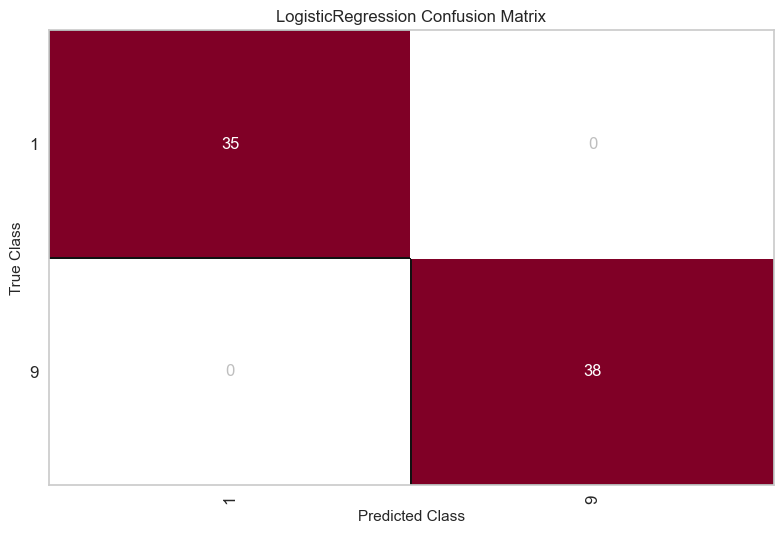

<AxesSubplot:title={'center':'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [102]:
from yellowbrick.classifier import ClassificationReport, ConfusionMatrix

vizualizer = ConfusionMatrix(model, classes=[1,9], support=True)
vizualizer.fit(X_train, y_train)
vizualizer.score(X_test, y_test)
vizualizer.show()

El modelo predice correctamente los dígitos 1 y 9 con un 100% de precisión (no se equivoca nunca). Esto es así porque se trata de distinguir únicamente entre dos dígitos que son bastante diferentes entre sí, con lo que hay poco lugar al error.